In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset
# Ensure 'Advertising.csv' is in your folder
try:
    df = pd.read_csv('Advertising.csv')
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: 'Advertising.csv' not found. Please ensure the file is uploaded.")
    # Creating dummy data so the code runs for demonstration if file is missing
    data = {
        'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
        'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
        'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4],
        'Sales': [22.1, 10.4, 9.3, 18.5, 12.9]
    }
    df = pd.DataFrame(data)

# If there is an unnecessary index column (common in this dataset), drop it
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Display the first 5 rows
display(df.head())

Data loaded successfully!


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


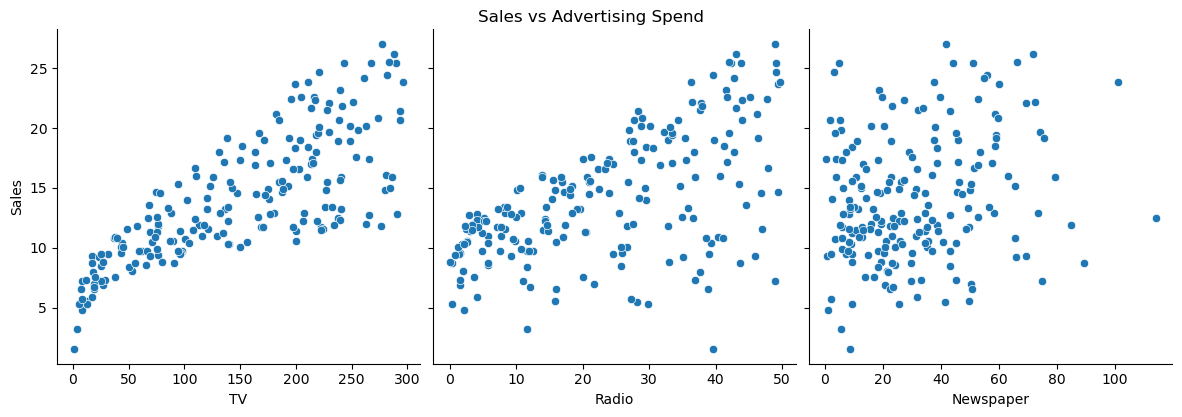

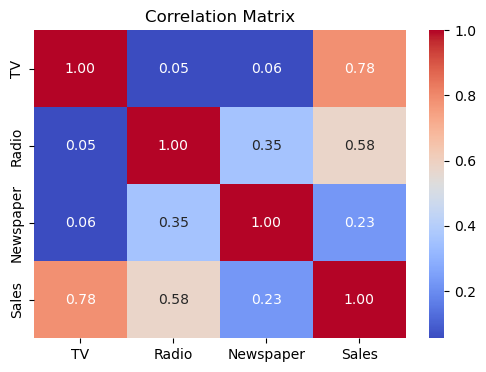

In [2]:
# Visualize the relationship between Features (Ad spend) and Target (Sales)
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Sales vs Advertising Spend", y=1.02)
plt.show()

# Check the correlation (To see which factor is most important)
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [3]:
# Features (X) = Advertising budgets
X = df[['TV', 'Radio', 'Newspaper']]

# Target (y) = Sales
y = df['Sales']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Model Accuracy (R² Score): 89.94%


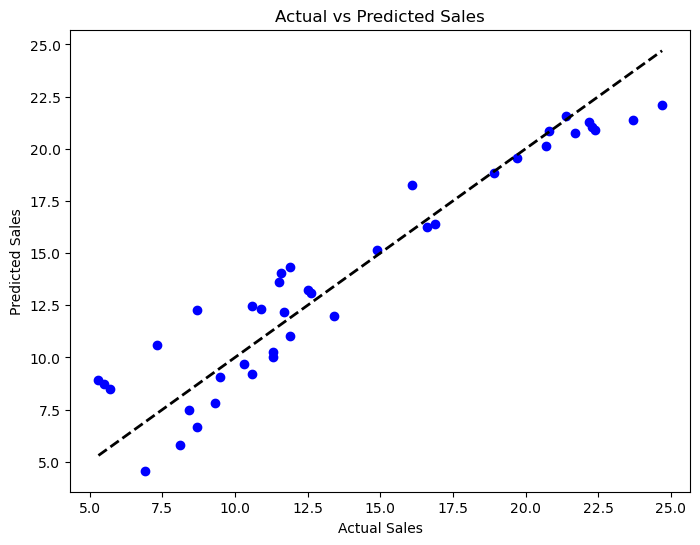

In [4]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate Accuracy (R-squared score)
r2 = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {r2 * 100:.2f}%")

# Visualize Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [5]:
# Define a new advertising budget
# Format: [[TV spend, Radio spend, Newspaper spend]]
new_ad_budget = pd.DataFrame([[150, 25, 10]], columns=['TV', 'Radio', 'Newspaper'])

# Predict sales
predicted_sales = model.predict(new_ad_budget)

print("\n--- Sales Prediction ---")
print(f"TV Budget: $150")
print(f"Radio Budget: $25")
print(f"Newspaper Budget: $10")
print(f"Predicted Sales: {predicted_sales[0]:.2f} units")


--- Sales Prediction ---
TV Budget: $150
Radio Budget: $25
Newspaper Budget: $10
Predicted Sales: 14.45 units


In [8]:
# Create a DataFrame to compare the actual values vs predicted values
comparison = pd.DataFrame({
    'Actual Sales': y_test.values, 
    'Predicted Sales': y_pred, 
    'Difference': y_test.values - y_pred
})

# Display the first 10 rows of comparison
print("\n--- Actual vs Predicted Sales Comparison ---")
display(comparison.head(10))



--- Actual vs Predicted Sales Comparison ---


,Actual Sales,Predicted Sales,Difference
0,16.9,16.408024,0.491976
1,22.4,20.889882,1.510118
2,21.4,21.553843,-0.153843
3,7.3,10.608503,-3.308503
4,24.7,22.112373,2.587627
5,12.6,13.105592,-0.505592
6,22.3,21.057192,1.242808
7,8.4,7.461010,0.938990
8,11.5,13.606346,-2.106346
9,14.9,15.155070,-0.255070
